## import library

In [2]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

from sklearn.metrics import confusion_matrix, accuracy_score

## LOAD & PREPARE DATASET

In [3]:
df=pd.read_csv("Jantungafteroutlier.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
1,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
2,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0
3,1,28.87,1,0,0,6,0,1,1,12,2,0,0,4,12,0,0,0
4,0,31.64,1,0,0,5,0,1,1,13,1,1,0,3,9,1,0,0


In [4]:
print ("Data Shape: ", df.shape)

Data Shape:  (289976, 18)


In [5]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.000000,289976.0
mean,0.077224,28.393972,0.407113,0.068557,0.034799,3.265391,3.983602,0.131680,0.526878,7.213280,1.749265,0.190281,0.775540,2.388036,7.078072,0.134104,0.033099,0.0
std,0.266946,6.425643,0.491297,0.252700,0.183272,7.809927,8.010688,0.338143,0.499278,3.539096,1.492525,0.495650,0.417227,1.038344,1.436614,0.340765,0.178896,0.0
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.0
50%,0.000000,27.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,1.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.0
75%,0.000000,31.570000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,10.000000,2.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.0
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,3.000000,1.000000,5.000000,24.000000,1.000000,1.000000,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289976 entries, 0 to 289975
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      289976 non-null  int64  
 1   BMI               289976 non-null  float64
 2   Smoking           289976 non-null  int64  
 3   AlcoholDrinking   289976 non-null  int64  
 4   Stroke            289976 non-null  int64  
 5   PhysicalHealth    289976 non-null  int64  
 6   MentalHealth      289976 non-null  int64  
 7   DiffWalking       289976 non-null  int64  
 8   Sex               289976 non-null  int64  
 9   AgeCategory       289976 non-null  int64  
 10  Race              289976 non-null  int64  
 11  Diabetic          289976 non-null  int64  
 12  PhysicalActivity  289976 non-null  int64  
 13  GenHealth         289976 non-null  int64  
 14  SleepTime         289976 non-null  int64  
 15  Asthma            289976 non-null  int64  
 16  KidneyDisease     28

In [7]:
df.HeartDisease.value_counts()

HeartDisease
0    267583
1     22393
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

17551

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [12]:
#gambaran mengenai distribusi nilai dalam setiap kolom
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3569' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '1' unique values


## SPLIT DATA TRAINING & TESTING


In [13]:
# Putting feature variable to X
X = df.drop('HeartDisease',axis=1)

# Putting response variable to y
y = df['HeartDisease']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

## FEATURE SELECTION

In [16]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
1,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
2,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0
3,28.87,1,0,0,6,0,1,1,12,2,0,0,4,12,0,0,0
4,31.64,1,0,0,5,0,1,1,13,1,1,0,3,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289971,27.41,1,0,0,7,0,1,0,9,5,1,0,4,6,1,0,0
289972,29.84,1,0,0,0,0,0,0,4,5,0,1,2,5,1,0,0
289973,24.24,0,0,0,0,0,0,1,6,5,0,1,3,6,0,0,0
289974,32.81,0,0,0,0,0,0,1,2,5,0,0,3,12,0,0,0


In [17]:
y

0         0
1         0
2         0
3         1
4         0
         ..
289971    1
289972    0
289973    0
289974    0
289975    0
Name: HeartDisease, Length: 272425, dtype: int64

In [18]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=300)

## BUILD MODEL

In [19]:
#MEMBUAT DT KLASIFIKASI MODEL GINI
model = DecisionTreeClassifier()

In [20]:
#FITTING THE MODEL
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
#MODEL PREDICTION

model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
#MODEL AKURASI GINI
model.score(X_test,y_test)

0.8660548774892172

In [23]:
#MEMBUAT MODEL DT KLASIFIKASI MODEL ENTROPHY
model_en = DecisionTreeClassifier(criterion='entropy')

In [24]:
#FITTING THE MODEL
model_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
#PREDIKSI MODEL PADA SUBSET DATA TRAIN
model_en.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
#AKURASI MODEL ENTROPHY DENGAN SUBSET DATA TRAIN
model_en.score(X_test,y_test)

0.8682389648527118

In [27]:
#so let us take first 500 records to understand


df1 = df.head(20000)

In [28]:
#splitting dataset into features and label again since we are now taking a part of the dataset

x1 = df1.drop(columns='HeartDisease')
y1 = df1.HeartDisease

In [29]:
#building the new model

model1 = DecisionTreeClassifier()

In [30]:
#fitting the new model

model1.fit(x1,y1)

DecisionTreeClassifier()

In [31]:
#number of classes in our new dataset
set(df1.HeartDisease)

{0, 1}

In [32]:
#saving our decision tree model

plt.savefig('model1')

<Figure size 640x480 with 0 Axes>

In [33]:
#model prediction with the train set

model1.predict(x1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
#displaying the first record 

X_test.iloc[0]

BMI                 23.57
Smoking              0.00
AlcoholDrinking      0.00
Stroke               0.00
PhysicalHealth       0.00
MentalHealth         0.00
DiffWalking          0.00
Sex                  1.00
AgeCategory          5.00
Race                 1.00
Diabetic             0.00
PhysicalActivity     1.00
GenHealth            2.00
SleepTime            8.00
Asthma               0.00
KidneyDisease        0.00
SkinCancer           0.00
Name: 131968, dtype: float64

In [35]:
#model prediction for the first record in test set

model1.predict([X_test.iloc[0]])  

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [36]:
#checking for expected values

y.head() 

0    0
1    0
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [37]:
#model test accuracy

model1.score(X_test,y_test)

0.8734697623199046

In [38]:
#train accuracy

model1.score(x1,y1)

0.99965

In [39]:
#computing the cost complexity for our train model & storing in path variable(taking the minimum)

path = model1.cost_complexity_pruning_path(x1,y1)

In [40]:
#DISPLAYING THE VALUE
path

{'ccp_alphas': array([0.00000000e+00, 1.52777778e-05, 1.64893617e-05, 1.65668663e-05,
        1.66666667e-05, 1.66666667e-05, 1.66666667e-05, 1.96721311e-05,
        1.98930481e-05, 1.98963731e-05, 1.99738220e-05, 2.01655970e-05,
        2.05756930e-05, 2.42424242e-05, 2.44680851e-05, 2.47448980e-05,
        2.47826087e-05, 2.48484848e-05, 2.49367089e-05, 2.66666667e-05,
        2.66666667e-05, 2.70557029e-05, 2.77777778e-05, 2.80471822e-05,
        2.83174603e-05, 2.85964912e-05, 2.91666667e-05, 2.96296296e-05,
        3.00000000e-05, 3.00000000e-05, 3.03030303e-05, 3.03030303e-05,
        3.03030303e-05, 3.07692308e-05, 3.07692308e-05, 3.09523810e-05,
        3.11111111e-05, 3.12500000e-05, 3.14285714e-05, 3.16666667e-05,
        3.16666667e-05, 3.16666667e-05, 3.16666667e-05, 3.17460317e-05,
        3.17460317e-05, 3.17479675e-05, 3.19444444e-05, 3.21428571e-05,
        3.21839080e-05, 3.22222222e-05, 3.22222222e-05, 3.22580645e-05,
        3.22580645e-05, 3.23076923e-05, 3.23529412

In [41]:
#this is done for minimal cost pruning - to take the one with the most minimum time complexity

ccp_alpha = path.ccp_alphas

In [42]:
#alpha values

ccp_alpha

array([0.00000000e+00, 1.52777778e-05, 1.64893617e-05, 1.65668663e-05,
       1.66666667e-05, 1.66666667e-05, 1.66666667e-05, 1.96721311e-05,
       1.98930481e-05, 1.98963731e-05, 1.99738220e-05, 2.01655970e-05,
       2.05756930e-05, 2.42424242e-05, 2.44680851e-05, 2.47448980e-05,
       2.47826087e-05, 2.48484848e-05, 2.49367089e-05, 2.66666667e-05,
       2.66666667e-05, 2.70557029e-05, 2.77777778e-05, 2.80471822e-05,
       2.83174603e-05, 2.85964912e-05, 2.91666667e-05, 2.96296296e-05,
       3.00000000e-05, 3.00000000e-05, 3.03030303e-05, 3.03030303e-05,
       3.03030303e-05, 3.07692308e-05, 3.07692308e-05, 3.09523810e-05,
       3.11111111e-05, 3.12500000e-05, 3.14285714e-05, 3.16666667e-05,
       3.16666667e-05, 3.16666667e-05, 3.16666667e-05, 3.17460317e-05,
       3.17460317e-05, 3.17479675e-05, 3.19444444e-05, 3.21428571e-05,
       3.21839080e-05, 3.22222222e-05, 3.22222222e-05, 3.22580645e-05,
       3.22580645e-05, 3.23076923e-05, 3.23529412e-05, 3.24613482e-05,
      

In [43]:
#building a multi decision tree model system with many ccp_alpha
dt_model= [] 
for ccp in ccp_alpha :
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1, y1)
    dt_model.append(dt_m)

KeyboardInterrupt: 

In [43]:
#finding the scores for both train set

train_score = [i.score(x1,y1) for i in dt_model]           #train accuracy
train_score

[0.99965,
 0.99965,
 0.99965,
 0.99965,
 0.9996,
 0.99965,
 0.99965,
 0.9996,
 0.99945,
 0.9995,
 0.9994,
 0.9993,
 0.9993,
 0.99935,
 0.9992,
 0.99915,
 0.99915,
 0.999,
 0.9989,
 0.99885,
 0.9987,
 0.9985,
 0.9986,
 0.9986,
 0.9983,
 0.9985,
 0.9983,
 0.9981,
 0.998,
 0.99795,
 0.9981,
 0.99795,
 0.9978,
 0.99775,
 0.9979,
 0.9975,
 0.99725,
 0.99755,
 0.99735,
 0.9975,
 0.9975,
 0.9971,
 0.99725,
 0.9972,
 0.9973,
 0.9969,
 0.99705,
 0.99705,
 0.99725,
 0.9969,
 0.997,
 0.9967,
 0.99675,
 0.99675,
 0.99655,
 0.99635,
 0.9963,
 0.99615,
 0.9965,
 0.99645,
 0.99615,
 0.9959,
 0.9962,
 0.99595,
 0.9959,
 0.9955,
 0.9957,
 0.99565,
 0.99535,
 0.99515,
 0.9946,
 0.99475,
 0.9948,
 0.99475,
 0.9948,
 0.99465,
 0.9945,
 0.9946,
 0.9948,
 0.99435,
 0.99435,
 0.99475,
 0.99455,
 0.99425,
 0.9947,
 0.99445,
 0.99465,
 0.99375,
 0.99385,
 0.99425,
 0.9948,
 0.994,
 0.9937,
 0.99365,
 0.9935,
 0.99335,
 0.99285,
 0.993,
 0.99215,
 0.99185,
 0.99235,
 0.99195,
 0.99175,
 0.99185,
 0.9916,
 0.992

In [44]:
#finding the scores for both train set

test_score = [i.score(X_test,y_test) for i in dt_model]  #test accuracy
test_score

[0.8746443975406075,
 0.8738551895016977,
 0.8748462879691659,
 0.8747178122419015,
 0.8744057997614022,
 0.8742406166834908,
 0.873561530696522,
 0.8740203725796091,
 0.8739653115536387,
 0.8747728732678719,
 0.8742589703588144,
 0.8750298247224007,
 0.8750665320730476,
 0.8750298247224007,
 0.8749931173717537,
 0.8759842158392218,
 0.8743323850601082,
 0.8744425071120492,
 0.8763879966963385,
 0.8764430577223089,
 0.8753418372028999,
 0.8761861062677802,
 0.87576397173534,
 0.8764614113976323,
 0.8760209231898688,
 0.8754519592548408,
 0.8745893365146371,
 0.8762044599431036,
 0.8753968982288703,
 0.8767367165274846,
 0.876296228319721,
 0.8765348260989263,
 0.8773240341378361,
 0.8756538496833991,
 0.876938606956043,
 0.87697531430669,
 0.8770120216573368,
 0.8766633018261907,
 0.8758740937872809,
 0.876791777553455,
 0.8756538496833991,
 0.8764614113976323,
 0.8759842158392218,
 0.8774708635404239,
 0.8758924474626044,
 0.876901899605396,
 0.876865192254749,
 0.8775626319170414,
 0

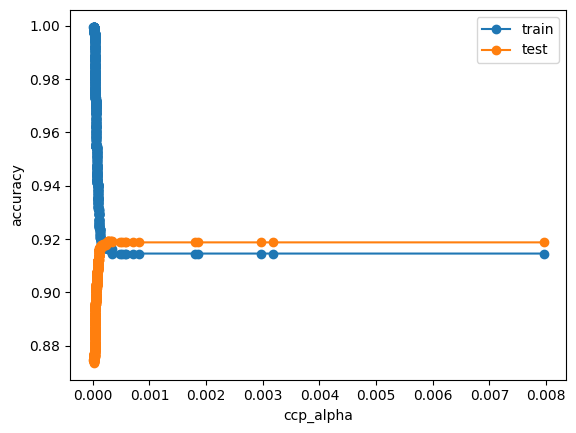

In [45]:
#visualizing models for both the train and test set

fix ,ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alpha,train_score,marker = 'o',label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alpha,test_score,marker = 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()

In [46]:
#training the model on the alpha value between 0.01 and 0.02 


model_cpp = DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)

In [47]:
#model fitting on the alpha value

model_cpp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [48]:
#importing libraries


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

[Text(0.5, 0.5, 'gini = 0.156\nsamples = 20000\nvalue = [18291, 1709]')]

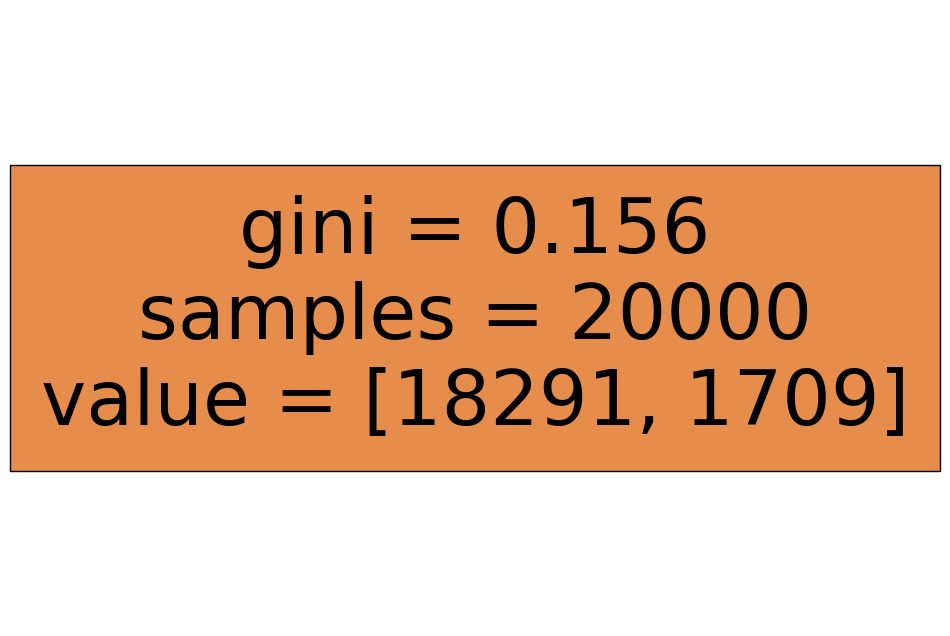

In [49]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model_cpp, filled=True) 

[Text(0.5, 0.5, 'gini = 0.156\nsamples = 20000\nvalue = [18291, 1709]')]

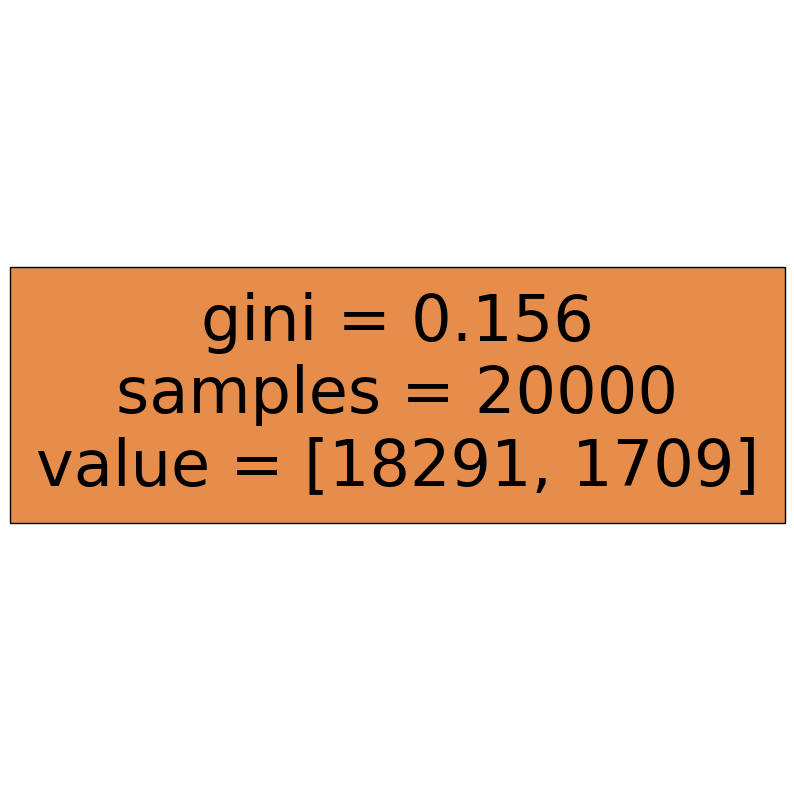

In [50]:
#model visualization

plt.figure(figsize=(10,10))
tree.plot_tree(model_cpp,filled=True)

In [51]:
#accuracy of the train model

model_cpp.score(x1,y1)

0.91455

In [52]:
#accuracy of the test model


model_cpp.score(X_test,y_test)  

0.9187482793429385

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid_param={
    "criterion": ['gini','entropy'],
    "splitter":['best','random'],
    "max_depth":range(2,40,1),
    "min_samples_split" : range(2,10,1),
    "min_samples_leaf" : range(1,10,1),
}

In [55]:
#passing our tree object (with cross validation as 5- splitting the dataset into 5 parts , n_jobs as -1 (occupying all the CPU))

grid_ccp = GridSearchCV(estimator=model_cpp,param_grid=grid_param,cv=5,n_jobs=-1)

In [56]:
#passing our tree object (with cross validation as 5- splitting the dataset into 5 parts , n_jobs as -1 (occupying all the CPU))

grid_ccp = GridSearchCV(estimator=model_cpp,param_grid=grid_param,cv=5,n_jobs=-1)

In [57]:
#model fitting-->testing with all possible parameters

grid_ccp.fit(x1,y1)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.02, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [58]:
#best parameter

grid_ccp.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [59]:
#new model building

model_cpp_new = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=2,min_samples_split=6,splitter='random')

In [60]:
model_cpp_new.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=6, splitter='random')

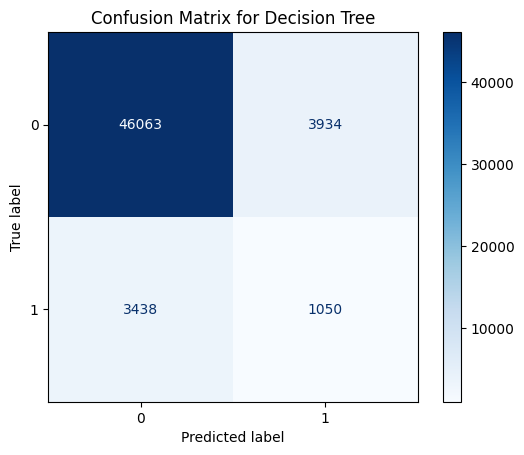

Confusion Matrix:
 [[46063  3934]
 [ 3438  1050]]


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 2. Membagi Dataset menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Membuat dan Melatih Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 4. Melakukan Prediksi pada Data Testing
y_pred = dt_model.predict(X_test)

# 5. Menghasilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Menampilkan Confusion Matrix dengan Visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# 7. Menampilkan Confusion Matrix dalam Bentuk Teks
print("Confusion Matrix:\n", cm)


## MODEL DT COBA PERTAMA


In [62]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler


# Membagi dataset resampled menjadi train dan test set (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Decision Tree dengan max_depth = 10
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = clf.predict(X_test)

# Menghitung akurasi, precision, recall, dan F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

# Menampilkan classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 91.76%
Precision: 84.20%
Recall: 91.76%
F1 Score: 87.82%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     49997
           1       0.00      0.00      0.00      4488

    accuracy                           0.92     54485
   macro avg       0.46      0.50      0.48     54485
weighted avg       0.84      0.92      0.88     54485



c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

## MODEL DECISION TREE DENGAN K-FOLD CROSS-VALIDATION

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report


# Initialize the decision tree classifier
dt = DecisionTreeClassifier(max_depth=10)

# Initialize KFold with k=5 (for example)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List to store accuracy for each fold
accuracies = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    dt.fit(X_train, y_train)
    
    # Make predictions
    y_pred = dt.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Print classification report for each fold
    print(f"Fold {len(accuracies)}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}")
    print("")

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracies) / len(accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Optional: Using cross_val_score for a simpler approach
scores = cross_val_score(dt, X, y, cv=kf)
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Cross-Validation Accuracy: {scores.mean():.2f}")


NameError: name 'X' is not defined

In [ ]:
h

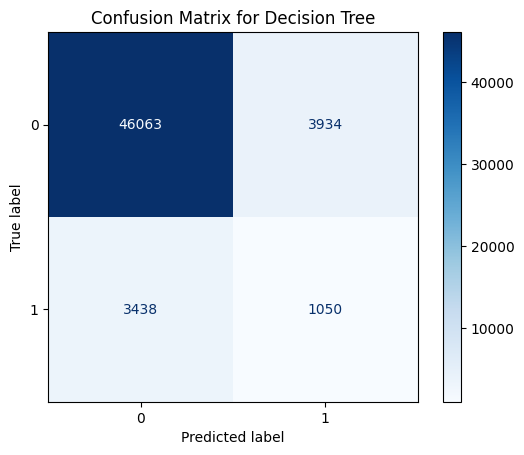

Confusion Matrix:
 [[46063  3934]
 [ 3438  1050]]


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 2. Membagi Dataset menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Membuat dan Melatih Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 4. Melakukan Prediksi pada Data Testing
y_pred = dt_model.predict(X_test)

# 5. Menghasilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Menampilkan Confusion Matrix dengan Visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# 7. Menampilkan Confusion Matrix dalam Bentuk Teks
print("Confusion Matrix:\n", cm)


In [65]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [66]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.922492429108929


array([[198554,   1581],
       [ 15311,   2494]], dtype=int64)

In [67]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9231715150958979


array([[49625,   372],
       [ 3814,   674]], dtype=int64)

In [68]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [69]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [70]:
y_pred_gini = clf_gini.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9182


In [72]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9193


In [74]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9193
Test set score: 0.9182


[Text(0.5, 0.9166666666666666, 'x[12] <= 3.5\ngini = 0.15\nsamples = 217940\nvalue = [200135, 17805]'),
 Text(0.25, 0.75, 'x[8] <= 9.5\ngini = 0.108\nsamples = 185563\nvalue = [174973, 10590]'),
 Text(0.125, 0.5833333333333334, 'x[3] <= 0.5\ngini = 0.054\nsamples = 131677\nvalue = [128040, 3637]'),
 Text(0.0625, 0.4166666666666667, 'x[8] <= 6.5\ngini = 0.049\nsamples = 129948\nvalue = [126713, 3235]'),
 Text(0.03125, 0.25, 'x[12] <= 2.5\ngini = 0.02\nsamples = 81206\nvalue = [80374, 832]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.014\nsamples = 56764\nvalue = [56357, 407]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.034\nsamples = 24442\nvalue = [24017, 425]'),
 Text(0.09375, 0.25, 'x[12] <= 2.5\ngini = 0.094\nsamples = 48742\nvalue = [46339, 2403]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.06\nsamples = 31101\nvalue = [30132, 969]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.149\nsamples = 17641\nvalue = [16207, 1434]'),
 Text(0.1875, 0.4166666666666667, 'x[10]

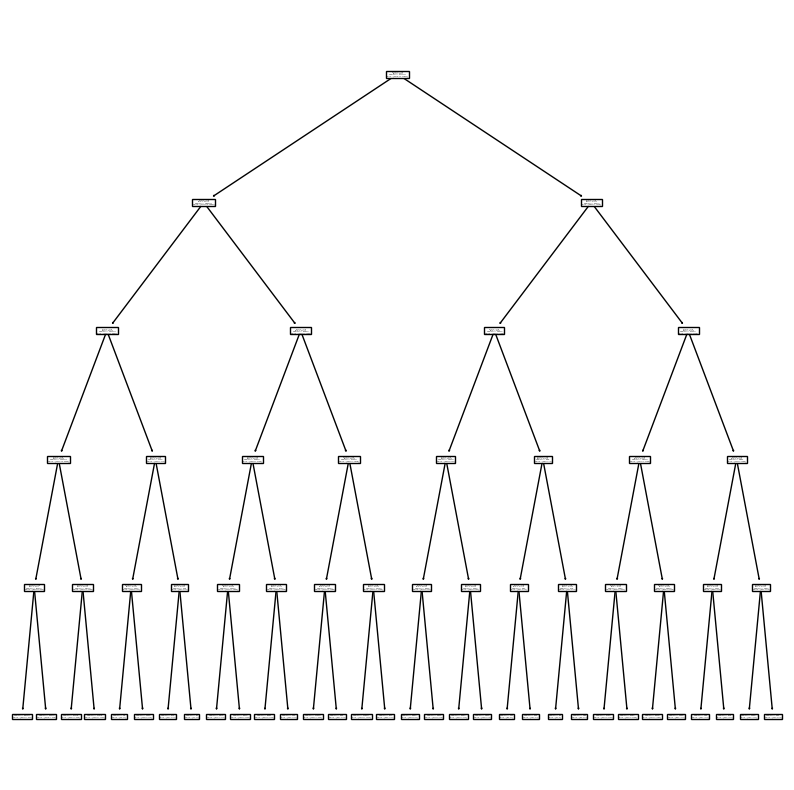

In [75]:
plt.figure(figsize=(10, 10))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

[Text(0.5, 0.5, 'gini = 0.156\nsamples = 20000\nvalue = [18291, 1709]')]

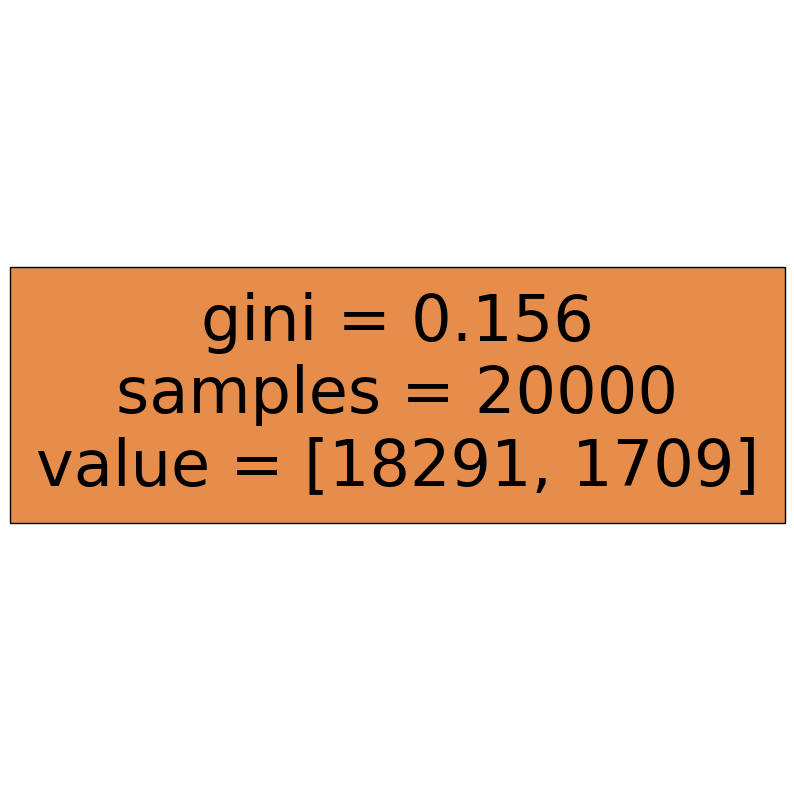

In [76]:
import graphviz
from sklearn.tree import export_graphviz

#model visualization
plt.figure(figsize=(10,10))
tree.plot_tree(model_cpp,filled=True)

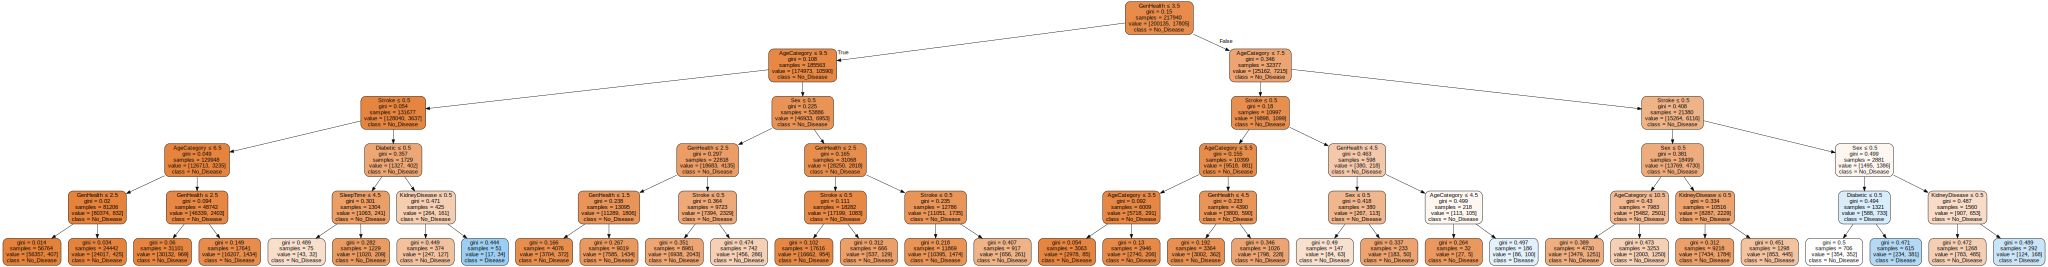

In [77]:
import graphviz
from sklearn.tree import export_graphviz

# Assume clf_gini is your trained Decision Tree classifier
# and X_train, y_train are your training data

dot_data = export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=['No_Disease', 'Disease'],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph

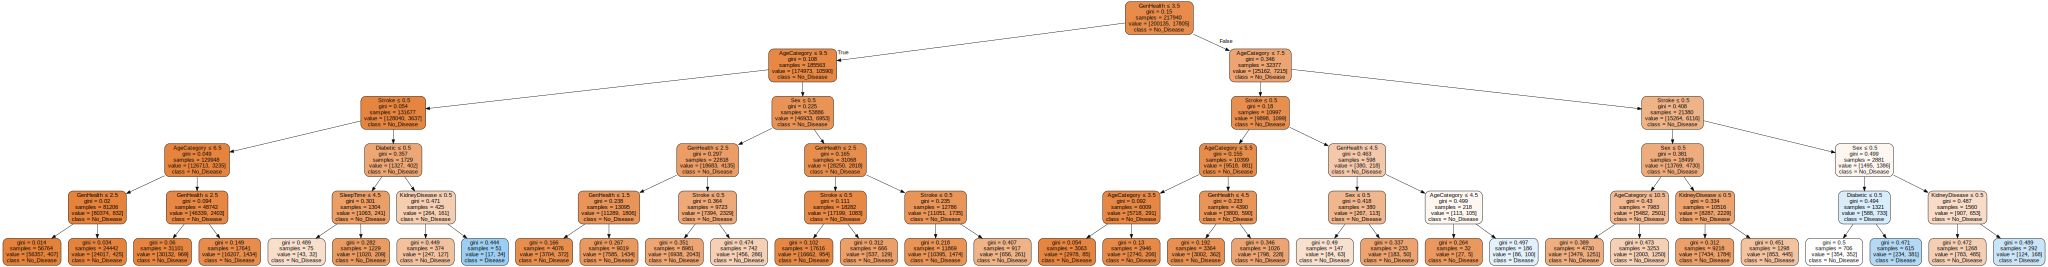

In [78]:
import graphviz
from sklearn.tree import export_graphviz

# Assume clf_gini is your trained Decision Tree classifier
# and X_train, y_train are your training data

dot_data = export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=['No_Disease', 'Disease'],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Create the Decision Tree model
dt = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Evaluate the best estimator
print(best_dt.score(X_test, y_test))

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.9184362668624392


In [80]:
from sklearn.model_selection import cross_val_score

best_dt = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(dt, X_test, y_test, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.86859974 0.87025142 0.86896678 0.8691503  0.86951734 0.86545521
 0.86729075 0.86692364 0.85407489 0.86839207]
Mean CV Accuracy: 0.8668622157563567


Confusion Matrix:
[[49907    90]
 [ 4354   134]]


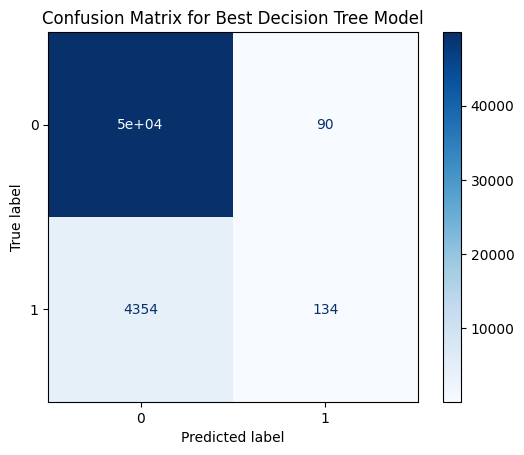

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lakukan prediksi dengan model terbaik
y_pred = best_dt.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk teks
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Best Decision Tree Model")
plt.show()


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assume X_train and y_train are already defined

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Now predict the diagnosis for the new data
new_data = pd.DataFrame({
    'BMI': [10.0],
    'Smoking': [1],
    'AlcoholDrinking': [1],
    'Stroke': [1],
    'PhysicalHealth': [9],
    'MentalHealth': [10],
    'DiffWalking': [1],
    'Sex': [1],
    'AgeCategory': [12],
    'Race': [1],
    'Diabetic': [1],
    'PhysicalActivity': [0],
    'GenHealth': [4],
    'SleepTime': [2],
    'Asthma': [1],
    'KidneyDisease': [1],
    'SkinCancer': [1]
})

# Ensure the new data has the same columns as X_train
new_data = new_data[X_train.columns]

# Predict using the trained classifier
y_pred_new = clf.predict(new_data)

# Print the predicted diagnosis
print("Predicted Diagnosis for New Data:", y_pred_new[0])  # Access the first element for single prediction

Predicted Diagnosis for New Data: 0


In [83]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the Decision Tree model using a confusion matrix
conf_mat_dt = metrics.confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree Model:")
print(conf_mat_dt)

# Print the accuracy, precision, recall, and F1 score for the Decision Tree model
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
precision_dt = metrics.precision_score(y_test, y_pred_dt)
recall_dt = metrics.recall_score(y_test, y_pred_dt)
f1_dt = metrics.f1_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Confusion Matrix for Decision Tree Model:
[[46063  3934]
 [ 3438  1050]]
Accuracy: 0.8646967055152794
Precision: 0.21067415730337077
Recall: 0.2339572192513369
F1 Score: 0.22170608108108109


Confusion Matrix:
[[49907    90]
 [ 4354   134]]


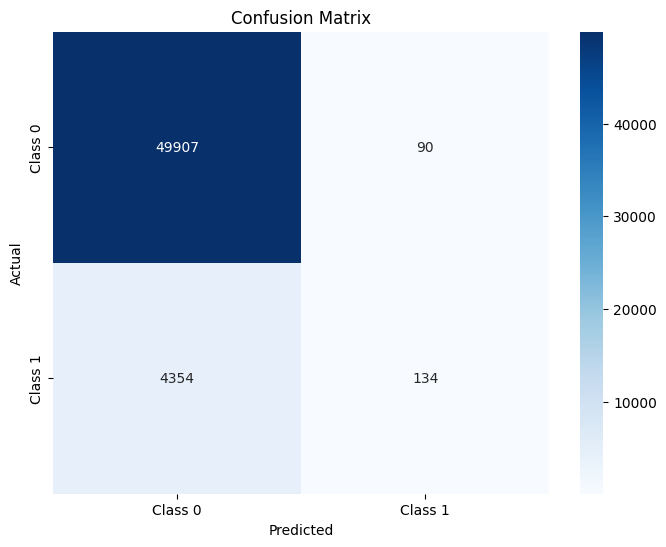

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set using the best estimator
y_pred = best_dt.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Now predict the diagnosis for the new data (your `new_data` DataFrame)
new_data = pd.DataFrame({
    'BMI': [10.0],
    'Smoking': [1],
    'AlcoholDrinking': [1],
    'Stroke': [1],
    'PhysicalHealth': [9],
    'MentalHealth': [10],
    'DiffWalking': [1],
    'Sex': [1],
    'AgeCategory': [12],
    'Race': [1],
    'Diabetic': [1],
    'PhysicalActivity': [0],
    'GenHealth': [4],
    'SleepTime': [2],
    'Asthma': [1],
    'KidneyDisease': [1],
    'SkinCancer': [1]
})

# Predict using the trained classifier
y_pred_new = clf.predict(new_data)

# Print the predicted diagnosis
print("Predicted Diagnosis for New Data:", y_pred_new[0])  # Access the first element for single prediction


Predicted Diagnosis for New Data: 0


In [86]:
new_data = pd.DataFrame({
    'BMI'	: [16.6],
    'Smoking'	: [1],
    'AlcoholDrinking' : [0],
    'Stroke'	: [0],
    'PhysicalHealth' : [3],
    'MentalHealth'	: [30],
    'DiffWalking'	: [0],
    'Sex'	: [1],
    'AgeCategory' : [8],
    'Race' : [1],
    'Diabetic' : [1],
    'PhysicalActivity' : [1],
    'GenHealth'	: [2],
    'SleepTime'	: [5],
    'Asthma'	: [1],
    'KidneyDisease'	: [0],
    'SkinCancer' : [1]
})

# Predict using the trained classifier
y_pred_new = clf.predict(new_data)

# Print the predicted diagnosis
print("Predicted Diagnosis for New Data:", y_pred_new[0])  # Access the first element for single prediction


Predicted Diagnosis for New Data: 0


In [87]:
import pandas as pd

# Dapatkan probabilitas prediksi
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif

# Ekspor hasil ke file CSV
results = pd.DataFrame({
    'y_test': y_test,  # Label asli
    'y_prob': y_prob_dt  # Probabilitas prediksi
})
results.to_csv('dt_tanpa_undersampling.csv', index=False)

print("Hasil telah diekspor ke 'dt_tanpa_undersampling.csv'")


Hasil telah diekspor ke 'dt_tanpa_undersampling.csv'


In [88]:
import pickle

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Assuming you have your training and testing data (X_train, X_test, y_train, y_test)

# Create the model pipeline
model_numpy = make_pipeline(StandardScaler(), LinearSVC())

# Train the model
model_numpy.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_numpy.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Save the trained model (replace with your preferred filename)
with open("model_numpy.pkl", "wb") as model_file:
    pickle.dump(model_numpy, model_file)


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     49997
           1       0.61      0.02      0.04      4488

    accuracy                           0.92     54485
   macro avg       0.76      0.51      0.50     54485
weighted avg       0.89      0.92      0.88     54485



c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [90]:
#load model
with open('model_numpy.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

## LAST EXPERIMENT


C:\Users\M S I\AppData\Local\Temp\ipykernel_34028\750632785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=df, palette='pastel')


<Axes: xlabel='HeartDisease', ylabel='count'>

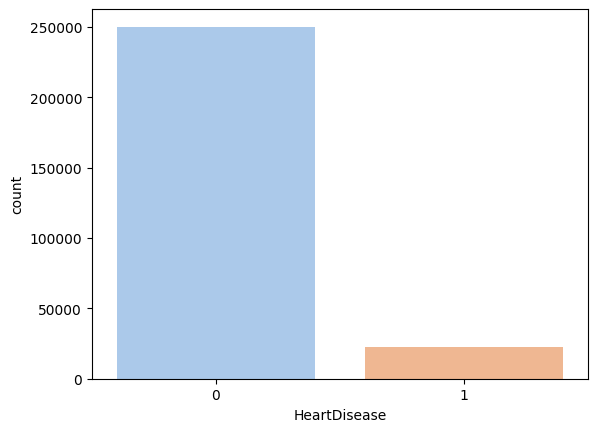

In [91]:
#undersampling, mengecek jumlah sebaran data target
sns.countplot(x='HeartDisease',data=df, palette='pastel')

In [92]:
#misahkan fitur dan label, semua atribut kecuali label class 
ind_col = [col for col in df.columns if col != 'HeartDisease']
dep_col = 'HeartDisease'

In [93]:
X.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Define the parameter grid (same as before)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize variables to track the best parameters and model
best_params = None
best_model = None
best_score = -1  # Start with a very low score

# Iterate over all combinations of parameters
for criterion in param_grid['criterion']:
    for splitter in param_grid['splitter']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    for max_features in param_grid['max_features']:
                        # Create and train the model
                        dt = DecisionTreeClassifier(
                            criterion=criterion,
                            splitter=splitter,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features
                        )
                        dt.fit(X_train, y_train)

                        # Evaluate on the test set
                        y_pred = dt.predict(X_test)
                        accuracy = accuracy_score(y_test, y_pred)

                        # Update the best model if the current one is better
                        if accuracy > best_score:
                            best_score = accuracy
                            best_params = {
                                'criterion': criterion,
                                'splitter': splitter,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features
                            }
                            best_model = dt

# Print the best parameters
print("Best Parameters:", best_params)

# Evaluate the best model with all metrics
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

# Optional: Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}
Accuracy: 0.9187849866935854
Precision: 0.8950338091196277
Recall: 0.9187849866935854
F1-Score: 0.8845710126815362

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     49997
           1       0.61      0.04      0.07      4488

    accuracy                           0.92     54485
   macro avg       0.77      0.52      0.51     54485
weighted avg       0.90      0.92      0.88     54485



In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Extract the best parameters
best_criterion = best_params['criterion']
best_splitter = best_params['splitter']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_max_features = best_params['max_features']

# Initialize the Decision Tree with best parameters
best_dt = DecisionTreeClassifier(
    criterion=best_criterion,
    splitter=best_splitter,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    max_features=best_max_features
)

# Custom scorer to evaluate multiple metrics
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    scores = {
        "accuracy": accuracy_score(y, y_pred),
        "precision": precision_score(y, y_pred, average='weighted'),
        "recall": recall_score(y, y_pred, average='weighted'),
        "f1": f1_score(y, y_pred, average='weighted'),
    }
    return scores

# Perform cross-validation with 10 folds
cv_results = cross_val_score(best_dt, X, y, cv=10, scoring='accuracy')  # Replace 'accuracy' with 'custom_scorer' if using custom metrics

# Print the cross-validation results
print("Cross-validation Accuracy Scores:", cv_results)
print("Mean Accuracy:", cv_results.mean())

# Example: For custom metrics (if needed)
# from sklearn.model_selection import cross_validate
# cv_results_custom = cross_validate(best_dt, X, y, cv=10, scoring={
#     'accuracy': 'accuracy',
#     'precision': make_scorer(precision_score, average='weighted'),
#     'recall': make_scorer(recall_score, average='weighted'),
#     'f1': make_scorer(f1_score, average='weighted'),
# })

# Print detailed custom metric scores
# print("Cross-validation Custom Metric Results:", cv_results_custom)


Cross-validation Accuracy Scores: [0.91913519 0.91799728 0.91814411 0.91818082 0.91814411 0.91854489
 0.91847148 0.9181044  0.91920564 0.91847148]
Mean Accuracy: 0.9184399397932885


In [ ]:
plt.figure(figsize=(35, 20 ), dpi=300)
tree.plot_tree(
    model,
    feature_names=ind_col,
    class_names=['No_Disease', 'Disease'],
    filled=True,
    fontsize=12
)

plt.savefig('decision_tree_aja.png', bbox_inches='tight', dpi=300)


In [97]:
# Simpan model ke file .pkl
with open('decision_tree_aja.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

print("Model Decision Tree berhasil disimpan sebagai decision_tree_aja.pkl")


Model Decision Tree berhasil disimpan sebagai decision_tree_aja.pkl


In [99]:
# Muat model dari file .pkl
with open('decision_tree_aja.pkl', 'rb') as file:
    loaded_dt_model = pickle.load(file)

# Gunakan model untuk prediksi
predictions = loaded_dt_model.predict(X_test)
print("Prediksi:", predictions)


Prediksi: [0 0 0 ... 0 0 0]


In [ ]:
import pickle
from sklearn.svm import SVC

# Contoh: Membuat model SVM
model = SVC(kernel='rbf', C=1, gamma=0.1)

# Training model (gunakan dataset Anda sendiri)
# X_train dan y_train adalah dataset pelatihan Anda
# model.fit(X_train, y_train)

# Menyimpan model ke file .pkl
with open('model_svm.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke file model_svm.pkl")


In [ ]:
# Membaca model dari file .pkl
with open('model_svm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model berhasil dimuat kembali")
# Anda bisa menggunakan model ini untuk prediksi
# predictions = loaded_model.predict(X_test)
